In [ ]:
# 외부 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# 데이터 준비하기
df_patient = pd.read_csv('PatientInfo.csv')
print(df_patient)
df_patient


      patient_id  global_num  gender  ...  released_date deceased_date     state
0     1000000001         2.0    male  ...     2020-02-05           NaN  released
1     1000000002         5.0    male  ...     2020-03-02           NaN  released
2     1000000003         6.0    male  ...     2020-02-19           NaN  released
3     1000000004         7.0    male  ...     2020-02-15           NaN  released
4     1000000005         9.0  female  ...     2020-02-24           NaN  released
...          ...         ...     ...  ...            ...           ...       ...
3383  7000000009      9651.0  female  ...            NaN           NaN  isolated
3384  7000000010         NaN  female  ...            NaN           NaN  isolated
3385  7000000011         NaN    male  ...            NaN           NaN  isolated
3386  7000000012         NaN  female  ...            NaN           NaN  isolated
3387  7000000013         NaN  female  ...            NaN           NaN  isolated

[3388 rows x 18 columns]


,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [ ]:
# COVID-19 데이터 확인하기
df_patient.head()

'''
id: 확진자의 id (n번째 확진자)
sex: 성별
birth_year: 출생 연도
country: 국적
region: 주 활동 지역 (광역시/도 단위)
group: 특정 집단 관련
infection_reason: 감염 경로
infection_order: 감염 차수 (n차 감염)
infected_by: 해당 확진자의 감염원 id
contact_number: 접촉자 수
confirmed_date: 확진 일자
released_date: 퇴원 일자 (격리 해제 일자)
deceased_date: 사망 일자
state: 상태
'''

'\nid: 확진자의 id (n번째 확진자)\nsex: 성별\nbirth_year: 출생 연도\ncountry: 국적\nregion: 주 활동 지역 (광역시/도 단위)\ngroup: 특정 집단 관련\ninfection_reason: 감염 경로\ninfection_order: 감염 차수 (n차 감염)\ninfected_by: 해당 확진자의 감염원 id\ncontact_number: 접촉자 수\nconfirmed_date: 확진 일자\nreleased_date: 퇴원 일자 (격리 해제 일자)\ndeceased_date: 사망 일자\nstate: 상태\n'

In [ ]:
df_patient.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [ ]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   gender              3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

In [ ]:
df_patient.isna().sum() #na 값이 몇개 인지를 세어주는 것이다.

patient_id               0
global_num            1112
gender                  77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

In [ ]:
# 생년 월일 정보를 사용하여 나이 데이터 생성하기
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,0,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [ ]:
df_patient.isna().sum() #na 값이 몇개 인지를 세어주는 것이다.

patient_id               0
global_num            1112
gender                  77
birth_year               0
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

In [ ]:
# 생년 월일 정보를 사용하여 나이 데이터 사용하기
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val : val if val>0 else np.nan) #np.nan 으로 바꿔주는 이유는? 나중에 숫자로 계산할 때, numpy에서 제공하는 nan 함수를 쓰면, 오류가 뜨지 않는다.
df_patient

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [ ]:
df_patient.isna().sum() #na 값이 몇개 인지를 세어주는 것이다.

patient_id               0
global_num            1112
gender                  77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

In [ ]:
# 0보다 큰 값은 그 값 그대로 사용하고, 0인 값은 NaN으로 변환 -> 나이 계산 시 2020살 방지
df_patient['age'] = 2020 - df_patient['birth_year']
df_patient.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,56.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,33.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,56.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,29.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,28.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
# 전처리 한 데이터 patient 변수에 담기
patient = df_patient

In [ ]:
# 격리해제자 (released) 들의 정보 released 변수 담기
released = patient[patient.state=='released']
released

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,56.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,33.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,56.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,29.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,28.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,7000000003,4345.0,female,1972.0,48.0,Korea,Jeju-do,etc,NaN,etc,NaN,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released
3378,7000000004,5534.0,male,1974.0,46.0,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,74.0,NaN,2020-03-04,2020-03-21,NaN,released
3380,7000000006,9087.0,male,NaN,NaN,United States,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,23.0,NaN,2020-03-24,2020-04-17,NaN,released
3381,7000000007,9281.0,female,1996.0,24.0,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,26.0,NaN,2020-03-25,2020-04-03,NaN,released


In [ ]:
# 격리자 (isolated) 들의 정보 isolated 변수 담기
isolated_state = patient[patient.state=='isolated']
isolated_state

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
14,1000000015,40.0,male,1943.0,77.0,Korea,Seoul,Seongdong-gu,NaN,Seongdong-gu APT,NaN,NaN,8.0,2020-02-11,2020-02-19,NaN,NaN,isolated
87,1000000088,3790.0,male,1975.0,45.0,Korea,Seoul,Gwangjin-gu,NaN,Seongdong-gu APT,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated
101,1000000102,5666.0,female,1971.0,49.0,Korea,Seoul,Yongsan-gu,NaN,Seongdong-gu APT,NaN,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
130,1000000131,7401.0,female,1969.0,51.0,Korea,Seoul,Eunpyeong-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,2020-03-07,2020-03-09,NaN,NaN,isolated
132,1000000133,7514.0,female,1977.0,43.0,Korea,Seoul,Gangdong-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-09,NaN,NaN,isolated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [ ]:
# 사망자 (deceased) 들의 정보 deceased 변수 담기
dead = patient[patient.state=='deceased']
dead

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
108,1000000109,6773.0,male,1929.0,91.0,Korea,Seoul,etc,NaN,contact with patient,NaN,NaN,NaN,2020-03-02,2020-03-07,NaN,NaN,deceased
284,1000000285,8602.0,male,1976.0,44.0,Korea,Seoul,Mapo-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,deceased
703,1100000071,NaN,male,1941.0,79.0,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,1.0,2020-02-28,2020-02-28,NaN,NaN,deceased
727,1100000095,NaN,female,1932.0,88.0,Korea,Busan,etc,NaN,NaN,NaN,NaN,24.0,2020-02-15,2020-03-13,NaN,NaN,deceased
729,1100000097,NaN,male,1947.0,73.0,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,11.0,2020-03-09,2020-03-13,NaN,NaN,deceased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,6020100107,107.0,male,1953.0,67.0,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased
3152,6020100205,205.0,female,1965.0,55.0,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-21,deceased
3153,6020100286,286.0,male,1958.0,62.0,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-23,deceased
3154,6020100298,298.0,male,1962.0,58.0,Korea,Gyeongsangbuk-do,Cheongdo-gun,True,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-25,deceased


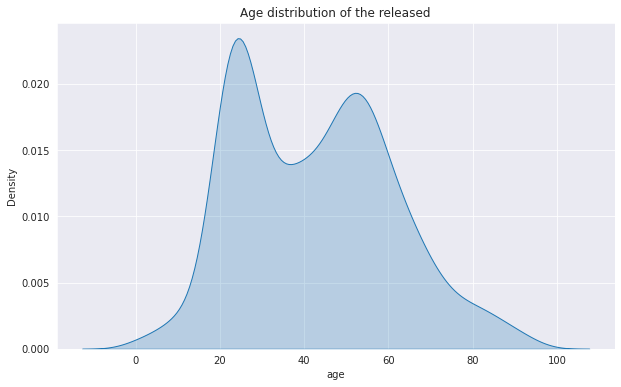

In [ ]:
# 격리해제자들의 연령대 분포 시각화
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the released")
sns.kdeplot(data=released['age'], shade = True) # shade=True 는 무엇인가? 넓이 부분에 색깔 넣는 것이다.

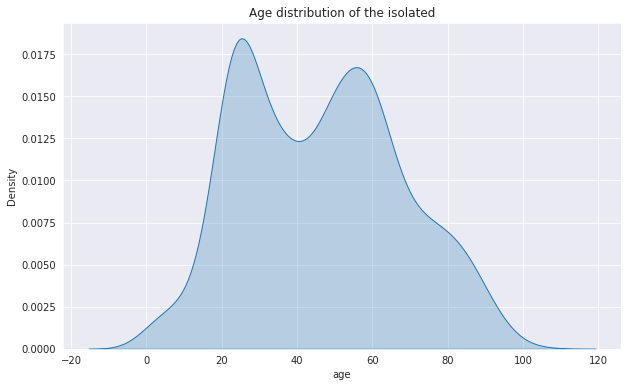

In [ ]:
# 격리된 환자의 연령대 분포 시각화
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the isolated")
sns.kdeplot(data = isolated_state['age'], shade=True)

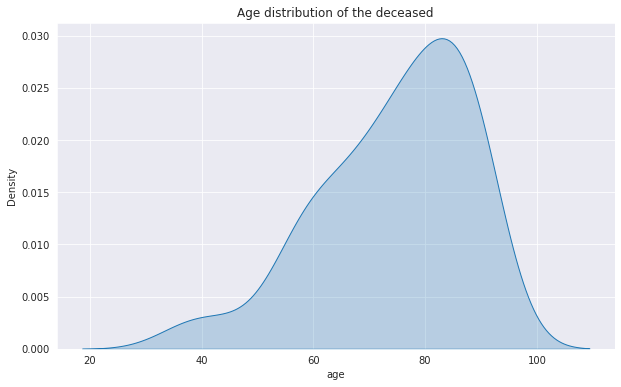

In [ ]:
# 사망자의 정보 dead 변수 담기
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased")
sns.kdeplot(data=dead['age'], shade=True)

In [ ]:
# 사망자에 따른 성별(gender) 데이터 분리하여, 변수에 담기 (male_dead, female_dead)
male_dead = dead[dead.gender=='male']
female_dead = dead[dead.gender=='female']

#데이터 확인하기
male_dead.head(5)
female_dead.head(5)

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
727,1100000095,NaN,female,1932.0,88.0,Korea,Busan,etc,NaN,NaN,NaN,NaN,24.0,2020-02-15,2020-03-13,NaN,NaN,deceased
772,1200000038,38.0,female,1963.0,57.0,Korea,Daegu,Nam-gu,True,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased
813,1200000901,901.0,female,1934.0,86.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,NaN,2020-03-04,deceased
814,1200001064,1064.0,female,1943.0,77.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-26,NaN,2020-03-01,deceased
820,1200002614,2614.0,female,1943.0,77.0,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-29,NaN,2020-03-01,deceased


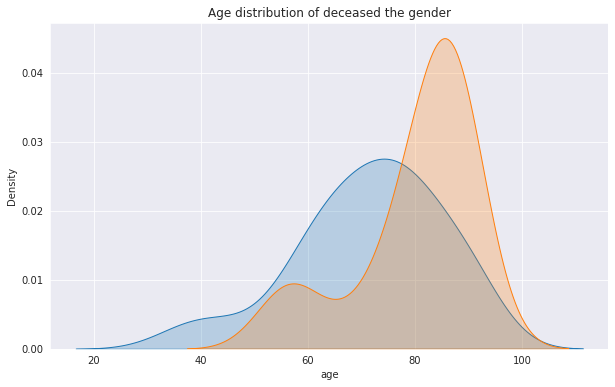

In [ ]:
# 성별에 따른 사망자의 연령분포 - kdeplot 사용

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of deceased the gender")
sns.kdeplot(data=male_dead['age'], label="Male", shade=True)
sns.kdeplot(data=female_dead['age'], label="Female", shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


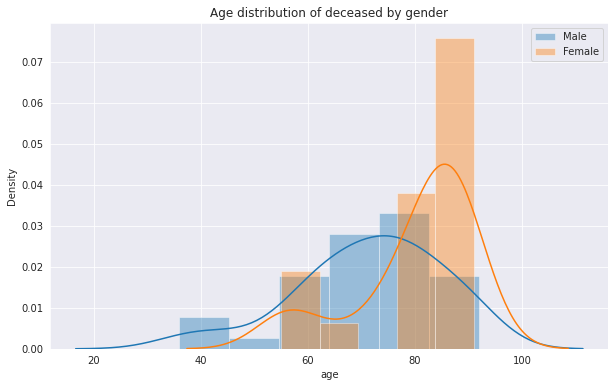

In [ ]:
# 사망자에 따른 성별(gender) 연령분포 - distplot 사용

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of deceased by gender")
sns.distplot(a=male_dead['age'], label="Male", kde=True)
sns.distplot(a=female_dead['age'], label="Female", kde=True) #distplot은 막대그래프 / kde=True 는 곡선그래프
plt.legend()

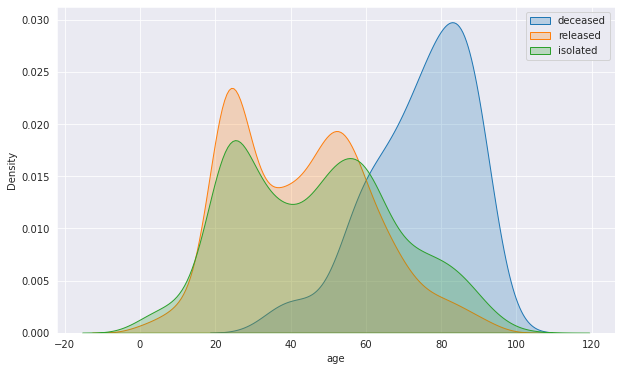

In [ ]:
# 격리해제자와 사망자의 연령대 비교

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.kdeplot(data=dead['age'], label="deceased", shade=True)
sns.kdeplot(data=released['age'], label="released", shade=True)
sns.kdeplot(data=isolated_state['age'], label="isolated", shade=True)
plt.legend()

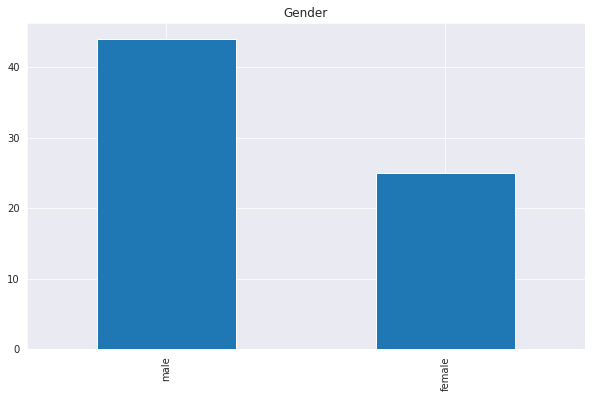

In [ ]:
# 사망자 성별 비교 - bar 차트 사용
plt.figure(figsize=(10,6))
plt.title("Gender")
dead.gender.value_counts().plot.bar()

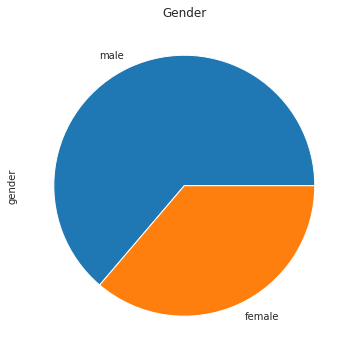

In [ ]:
# 사망자 성별 비교 - pie 차트 사용
plt.figure(figsize=(10,6))
plt.title("Gender")
dead.gender.value_counts().plot.pie()

In [ ]:
df_patient.state.value_counts().plot.pie(explode=explode, autopct=)

SyntaxError: ignored

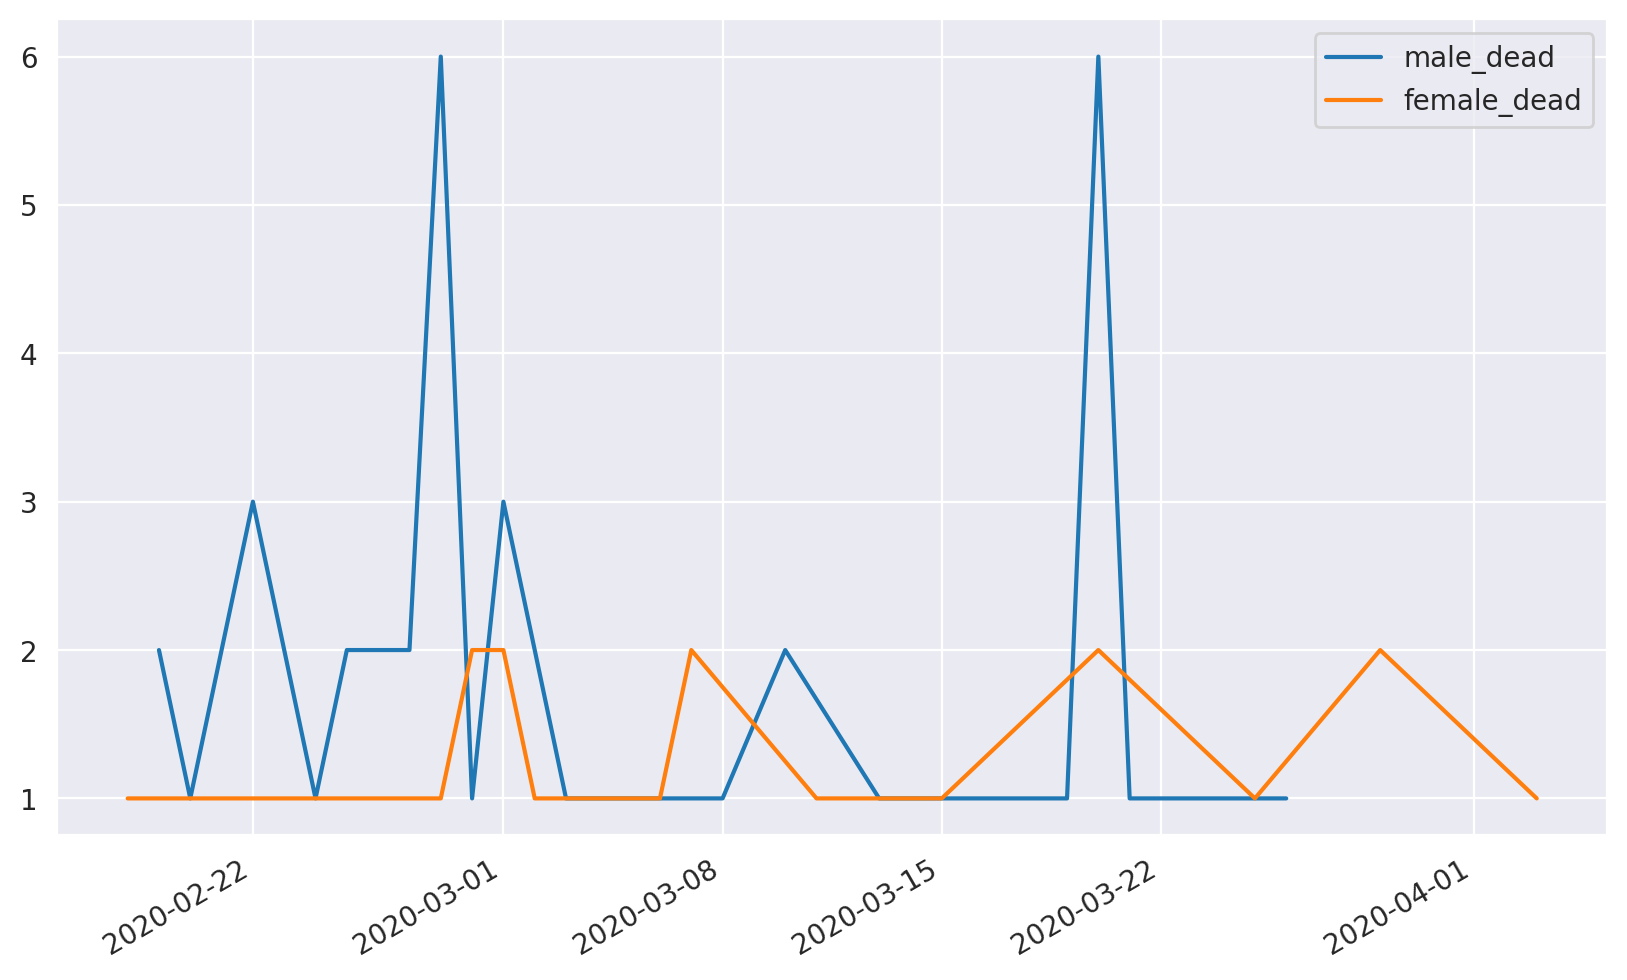

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
#pd.to_datetime(dead.confirmed_date).value_counts().plot(lablel='dead')
pd.to_datetime(male_dead.confirmed_date).value_counts().plot(label='male_dead') #날짜형태로 바꾸고, 값을세고, 플로트해라
pd.to_datetime(female_dead.confirmed_date).value_counts().plot(label='female_dead')
plt.legend()